In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Exportación de excel a csv 

In [2]:
# Convertir el archivo de consumo.xlsx a CSV
consumo_df = pd.read_excel('consumo.xlsx')
consumo_df.to_csv('consumo.csv', index=False)

# Convertir el archivo de importacion.xlsx a CSV
importacion_df = pd.read_excel('importacion.xlsx')
importacion_df.to_csv('importacion.csv', index=False)

#haz un csv para cada hoja del excel de precios 
precios_df = pd.read_excel('precios.xlsx', sheet_name=None)

#unir las 4 hojas de precios en un solo dataframe
precios_df = pd.concat(precios_df.values())
precios_df.to_csv('precios.csv', index=False)



print("Archivos CSV creados y limpiados exitosamente.")


Archivos CSV creados y limpiados exitosamente.


# Análisis Exploratorio 

In [3]:
# Filtrar columnas relevantes en consumo y importacion
consumo_filtered = consumo_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importacion_filtered = importacion_df[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
precios_filtered = precios_df[['FECHA', 'SUPERIOR GTQ/GALON', 'REGULAR GTQ/GALON', 'DIESEL GTQ/GALON', 'GTQ/CIL 25 LB']]

# Renombrar columnas para consistencia
precios_filtered.columns = ['Fecha', 'Gasolina superior', 'Gasolina regular', 'Diesel', 'Gas licuado']

In [4]:
# Convertir a formato datetime
consumo_filtered['Fecha'] = pd.to_datetime(consumo_filtered['Fecha'])
importacion_filtered['Fecha'] = pd.to_datetime(importacion_filtered['Fecha'])
precios_filtered['Fecha'] = pd.to_datetime(precios_filtered['Fecha'])

C:\Users\jsken\AppData\Local\Temp\ipykernel_11144\2397928179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_filtered['Fecha'] = pd.to_datetime(consumo_filtered['Fecha'])
C:\Users\jsken\AppData\Local\Temp\ipykernel_11144\2397928179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importacion_filtered['Fecha'] = pd.to_datetime(importacion_filtered['Fecha'])
C:\Users\jsken\AppData\Local\Temp\ipykernel_11144\2397928179.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [5]:
importacion_filtered

,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,0.00,194065.738095
1,2001-02-01,123115.99,243091.07,0.00,170703.380952
2,2001-03-01,161726.42,312084.38,0.00,161837.371429
3,2001-04-01,127338.74,285054.89,0.00,163048.642857
4,2001-05-01,168730.19,300913.67,0.00,171518.861905
...,...,...,...,...,...
277,2024-02-01,740662.25,650360.11,1236861.75,916541.700000
278,2024-03-01,838270.93,620077.74,1477038.00,675157.480000
279,2024-04-01,886132.77,687017.96,1294706.12,473940.660000
280,2024-05-01,939656.18,696970.30,1470870.09,684864.460000


In [6]:
consumo_filtered

,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
0,2000-01-01,202645.20,308156.82,0.00,194410.476190
1,2000-02-01,205530.96,307766.31,0.00,174710.552381
2,2000-03-01,229499.56,331910.29,0.00,189234.066667
3,2000-04-01,210680.40,315648.08,0.00,174330.607143
4,2000-05-01,208164.34,319667.97,0.00,191745.147619
...,...,...,...,...,...
289,2024-02-01,818740.16,654059.60,1340174.42,526897.850000
290,2024-03-01,870771.70,671997.05,1393324.52,523990.910000
291,2024-04-01,847353.15,633520.57,1428143.44,531880.190000
292,2024-05-01,894533.14,692427.94,1396161.97,536754.380000


In [7]:
# Estadísticas descriptivas
print(consumo_filtered.describe())
print(importacion_filtered.describe())
print(precios_filtered.describe())


                               Fecha  Gasolina regular  Gasolina superior  \
count                            294        294.000000         294.000000   
mean   2012-03-16 18:31:50.204081664     387877.634195      465123.002533   
min              2000-01-01 00:00:00     160741.900000      300242.781667   
25%              2006-02-08 00:00:00     214627.297917      382240.402500   
50%              2012-03-16 12:00:00     285343.705000      420304.655000   
75%              2018-04-23 12:00:00     526295.330000      568316.002500   
max              2024-06-01 00:00:00     894533.140000      768102.830000   
std                              NaN     210531.898078      108590.648175   

       Diesel bajo azufre  Gas licuado de petróleo  
count        2.940000e+02               294.000000  
mean         3.043604e+05            313069.932133  
min          0.000000e+00            167818.137897  
25%          0.000000e+00            225904.582202  
50%          0.000000e+00            2626

In [8]:
#valores nulos 
print('valores nulos de consumo')
print(consumo_filtered.isnull().sum())
print('valores nulos de importacion')
print(importacion_filtered.isnull().sum())
print('valores nulos de precios')
print(precios_filtered.isnull().sum())


valores nulos de consumo
Fecha                      0
Gasolina regular           0
Gasolina superior          0
Diesel bajo azufre         0
Gas licuado de petróleo    0
dtype: int64
valores nulos de importacion
Fecha                      0
Gasolina regular           0
Gasolina superior          0
Diesel bajo azufre         0
Gas licuado de petróleo    0
dtype: int64
valores nulos de precios
Fecha                0
Gasolina superior    0
Gasolina regular     0
Diesel               0
Gas licuado          0
dtype: int64


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

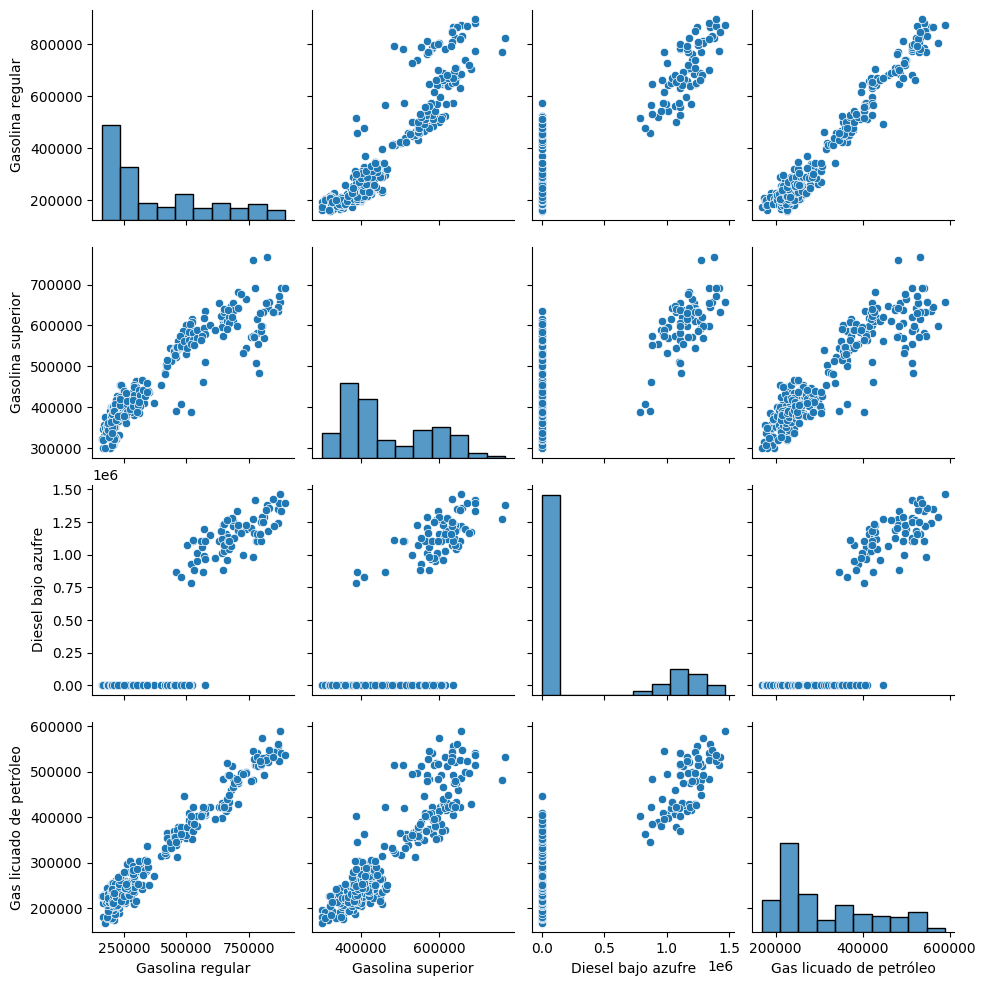

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

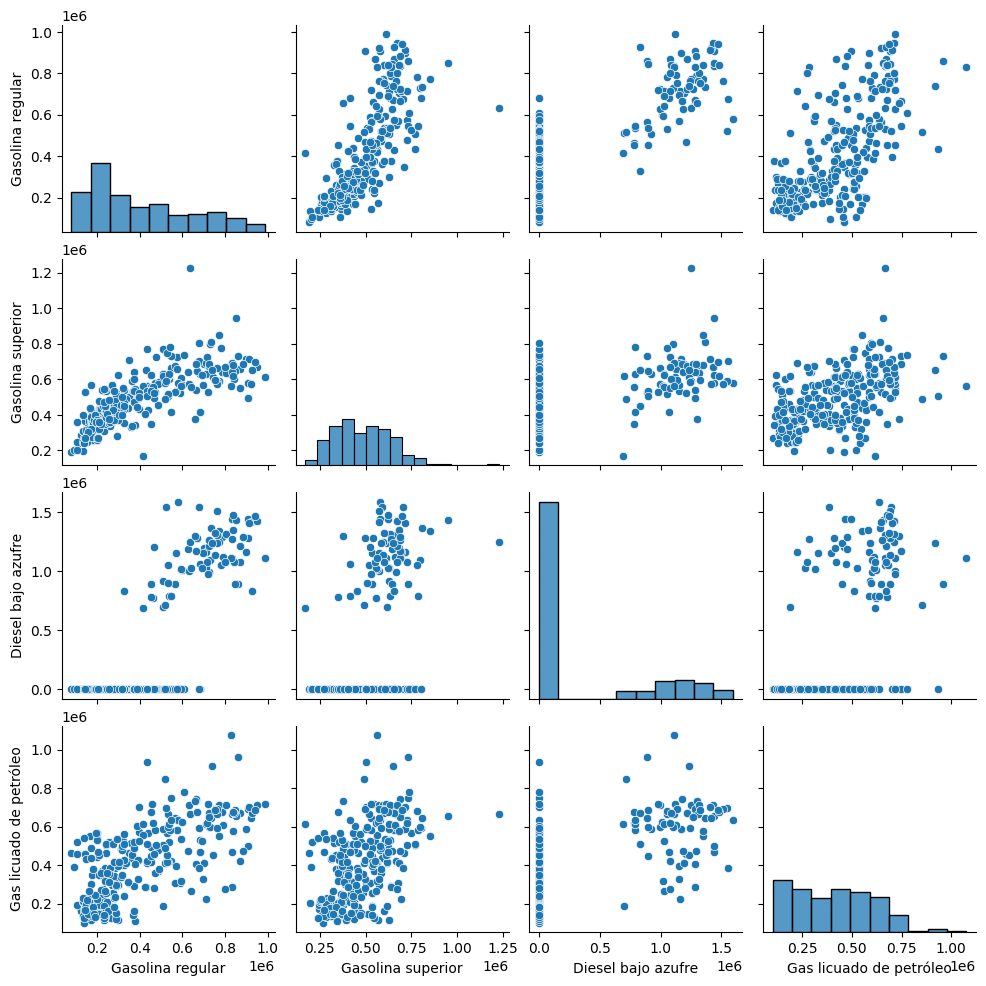

c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

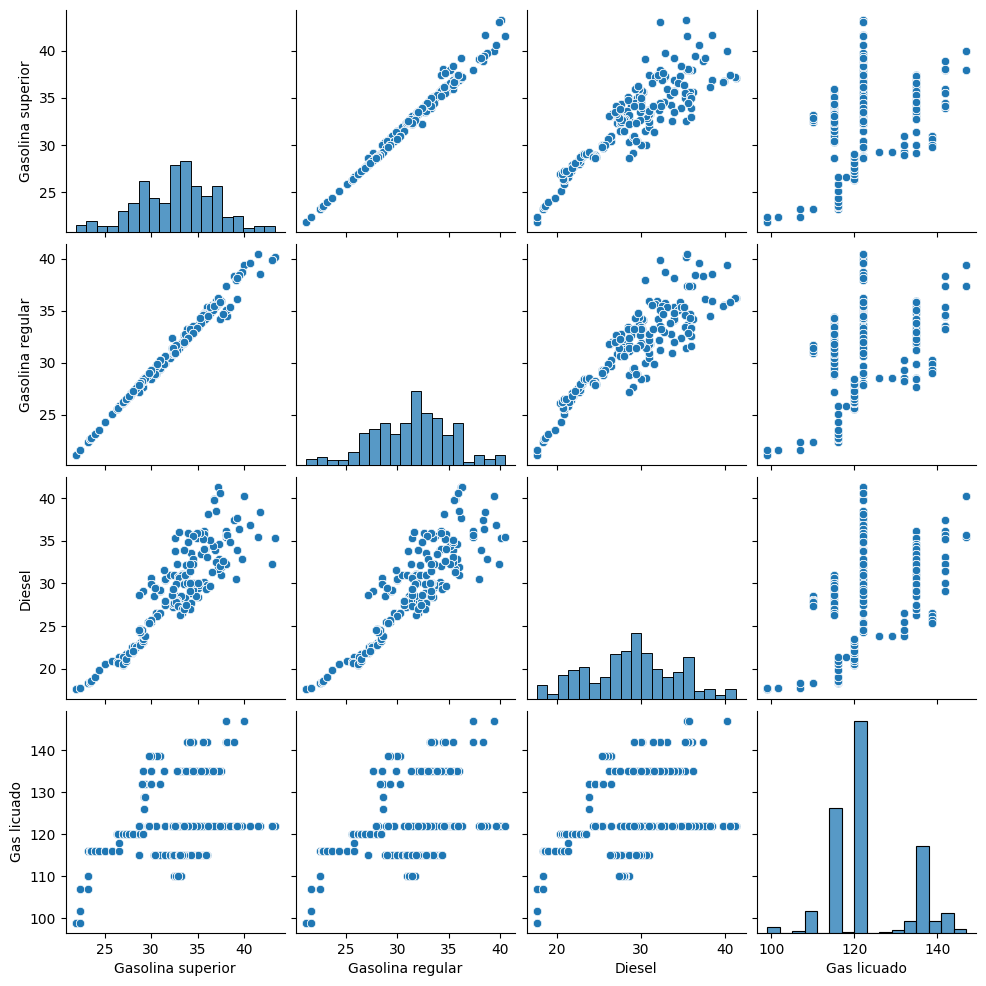

In [9]:
#ver distribuciones de los datos
sns.pairplot(consumo_filtered)
plt.show()

sns.pairplot(importacion_filtered)
plt.show()

sns.pairplot(precios_filtered)
plt.show()

In [10]:
# Excluir las columnas no numéricas antes de la agrupación
importacion_filtered_numeric = importacion_filtered.select_dtypes(include='number')



In [11]:
importacion_filtered_numeric

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
0,177776.50,373963.96,0.00,194065.738095
1,123115.99,243091.07,0.00,170703.380952
2,161726.42,312084.38,0.00,161837.371429
3,127338.74,285054.89,0.00,163048.642857
4,168730.19,300913.67,0.00,171518.861905
...,...,...,...,...
277,740662.25,650360.11,1236861.75,916541.700000
278,838270.93,620077.74,1477038.00,675157.480000
279,886132.77,687017.96,1294706.12,473940.660000
280,939656.18,696970.30,1470870.09,684864.460000


In [12]:
# Agregar nuevamente las columnas 'Fecha', 'Mes' y 'Año'
importacion_filtered_numeric['Fecha'] = importacion_filtered['Fecha']
importacion_filtered_numeric['Mes'] = importacion_filtered['Fecha'].dt.month
importacion_filtered_numeric['Año'] = importacion_filtered['Fecha'].dt.year



importacion_filtered_numeric

,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo,Fecha,Mes,Año
0,177776.50,373963.96,0.00,194065.738095,2001-01-01,1,2001
1,123115.99,243091.07,0.00,170703.380952,2001-02-01,2,2001
2,161726.42,312084.38,0.00,161837.371429,2001-03-01,3,2001
3,127338.74,285054.89,0.00,163048.642857,2001-04-01,4,2001
4,168730.19,300913.67,0.00,171518.861905,2001-05-01,5,2001
...,...,...,...,...,...,...,...
277,740662.25,650360.11,1236861.75,916541.700000,2024-02-01,2,2024
278,838270.93,620077.74,1477038.00,675157.480000,2024-03-01,3,2024
279,886132.77,687017.96,1294706.12,473940.660000,2024-04-01,4,2024
280,939656.18,696970.30,1470870.09,684864.460000,2024-05-01,5,2024


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

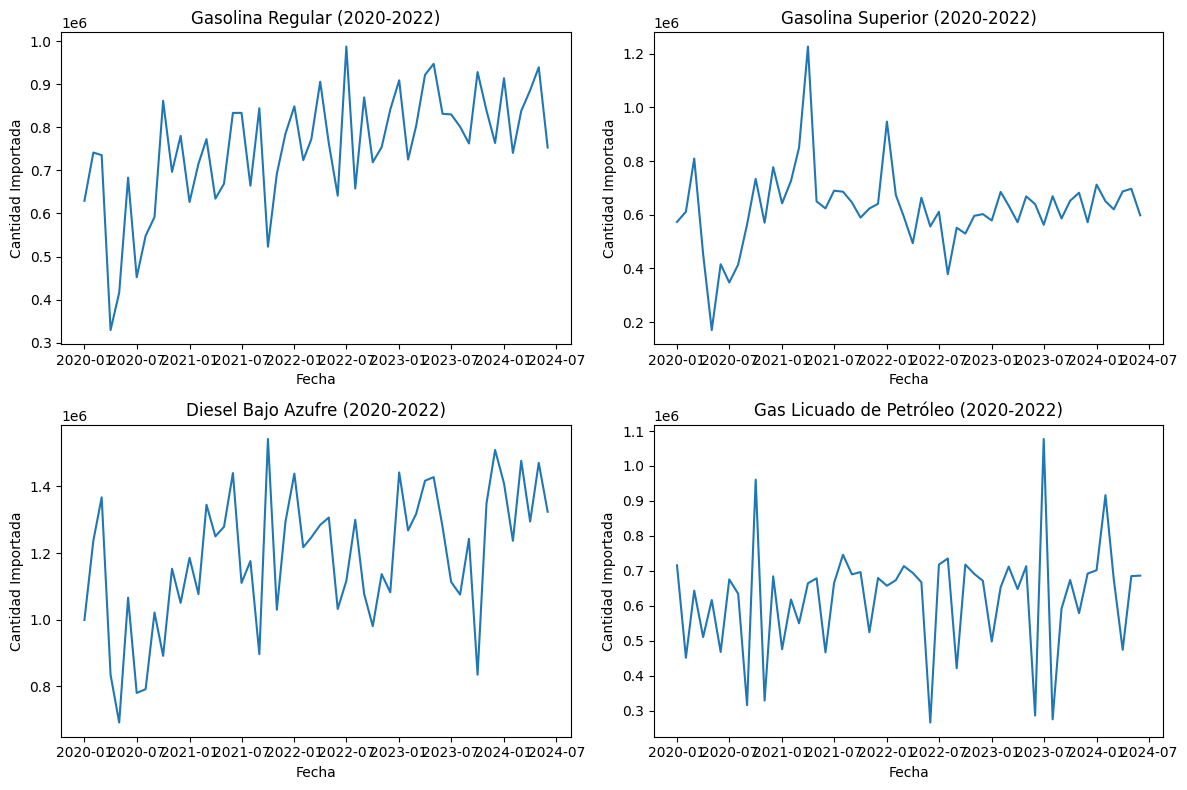

In [13]:
# Filtrar datos de la pandemia (2020-2022)
importacion_filtered_pandemia = importacion_filtered[importacion_filtered['Fecha'].dt.year >= 2020]

# Crear el gráfico de líneas para cada tipo de combustible por separado
plt.figure(figsize=(12, 8))

# Gráfico para Gasolina Regular
plt.subplot(2, 2, 1)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gasolina regular')
plt.title('Gasolina Regular (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Gasolina Superior
plt.subplot(2, 2, 2)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gasolina superior')
plt.title('Gasolina Superior (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Diesel Bajo Azufre
plt.subplot(2, 2, 3)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Diesel bajo azufre')
plt.title('Diesel Bajo Azufre (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Gráfico para Gas Licuado de Petróleo
plt.subplot(2, 2, 4)
sns.lineplot(data=importacion_filtered_pandemia, x='Fecha', y='Gas licuado de petróleo')
plt.title('Gas Licuado de Petróleo (2020-2022)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Importada')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [14]:
importacion_filtered

,Fecha,Gasolina regular,Gasolina superior,Diesel bajo azufre,Gas licuado de petróleo
0,2001-01-01,177776.50,373963.96,0.00,194065.738095
1,2001-02-01,123115.99,243091.07,0.00,170703.380952
2,2001-03-01,161726.42,312084.38,0.00,161837.371429
3,2001-04-01,127338.74,285054.89,0.00,163048.642857
4,2001-05-01,168730.19,300913.67,0.00,171518.861905
...,...,...,...,...,...
277,2024-02-01,740662.25,650360.11,1236861.75,916541.700000
278,2024-03-01,838270.93,620077.74,1477038.00,675157.480000
279,2024-04-01,886132.77,687017.96,1294706.12,473940.660000
280,2024-05-01,939656.18,696970.30,1470870.09,684864.460000


In [15]:
#evaluar la normalidad de las distribuciones 
from scipy.stats import shapiro


print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los combustibles en dataset de importacion:")
# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(importacion_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(importacion_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel Bajo Azufre
stat, p = shapiro(importacion_filtered['Diesel bajo azufre'])
print('Diesel Bajo Azufre:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado de Petróleo
stat, p = shapiro(importacion_filtered['Gas licuado de petróleo'])
print('Gas Licuado de Petróleo:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

    


Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los combustibles en dataset de importacion:
Gasolina Regular: stat=0.903, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.972, p=0.000
La muestra no parece provenir de una distribución normal
Diesel Bajo Azufre: stat=0.614, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado de Petróleo: stat=0.957, p=0.000
La muestra no parece provenir de una distribución normal


In [16]:
#test de normalidad para los precios

print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los precios en dataset de precios:")

# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(precios_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(precios_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')

else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel
stat, p = shapiro(precios_filtered['Diesel'])
print('Diesel:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado
stat, p = shapiro(precios_filtered['Gas licuado'])
print('Gas Licuado:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')
    

Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los precios en dataset de precios:
Gasolina Regular: stat=0.990, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.991, p=0.000
La muestra no parece provenir de una distribución normal
Diesel: stat=0.988, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado: stat=0.898, p=0.000
La muestra no parece provenir de una distribución normal


In [17]:
#test de normalidad para consumo 

print("Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los consumos en dataset de consumo:")
# Test de Shapiro-Wilk para Gasolina Regular
stat, p = shapiro(consumo_filtered['Gasolina regular'])
print('Gasolina Regular:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gasolina Superior
stat, p = shapiro(consumo_filtered['Gasolina superior'])
print('Gasolina Superior:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Diesel Bajo Azufre
stat, p = shapiro(consumo_filtered['Diesel bajo azufre'])
print('Diesel Bajo Azufre:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

# Test de Shapiro-Wilk para Gas Licuado de Petróleo
stat, p = shapiro(consumo_filtered['Gas licuado de petróleo'])
print('Gas Licuado de Petróleo:', 'stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('La muestra parece provenir de una distribución normal')
else:
    print('La muestra no parece provenir de una distribución normal')

    

Prueba de Shapiro-Wilk para evaluar la normalidad de las distribuciones de los consumos en dataset de consumo:
Gasolina Regular: stat=0.843, p=0.000
La muestra no parece provenir de una distribución normal
Gasolina Superior: stat=0.911, p=0.000
La muestra no parece provenir de una distribución normal
Diesel Bajo Azufre: stat=0.592, p=0.000
La muestra no parece provenir de una distribución normal
Gas Licuado de Petróleo: stat=0.883, p=0.000
La muestra no parece provenir de una distribución normal


# Seleccion de series a utilizar 
## Consumo de gasolina super y regular 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [19]:
# Selección de las series temporales para gasolina regular y superior
data_superior = consumo_filtered[['Fecha', 'Gasolina superior']].copy()


scaler_superior = MinMaxScaler(feature_range=(0, 1))
data_superior['Gasolina superior'] = scaler_superior.fit_transform(data_superior[['Gasolina superior']])

In [20]:
# Crear conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
def create_train_test(data, column_name, look_back=1):
    dataX, dataY = [], []
    for i in range(len(data) - look_back):
        dataX.append(data.iloc[i:(i + look_back)][column_name].values)
        dataY.append(data.iloc[i + look_back][column_name])
    return np.array(dataX), np.array(dataY)


In [21]:
look_back = 5


# Datos para Gasolina Superior
X_superior, y_superior = create_train_test(data_superior, 'Gasolina superior', look_back)
train_size = int(len(X_superior) * 0.8)
X_train_superior, X_test_superior = X_superior[:train_size], X_superior[train_size:]
y_train_superior, y_test_superior = y_superior[:train_size], y_superior[train_size:]

X_superior_tunned, y_superior_tunned = create_train_test(data_superior, 'Gasolina superior', look_back)
train_size = int(len(X_superior_tunned) * 0.8)
X_train_superior_tunned, X_test_superior_tunned = X_superior_tunned[:train_size], X_superior_tunned[train_size:]
y_train_superior_tunned, y_test_superior_tunned = y_superior_tunned[:train_size], y_superior_tunned[train_size:]

In [22]:
# Redimensionar las entradas para que sean [samples, time steps, features]

X_train_superior_tunned = np.reshape(X_train_superior_tunned, (X_train_superior_tunned.shape[0], look_back, 1))
X_test_superior_tunned = np.reshape(X_test_superior_tunned, (X_test_superior_tunned.shape[0], look_back, 1))

X_train_superior = np.reshape(X_train_superior, (X_train_superior.shape[0], look_back, 1))
X_test_superior = np.reshape(X_test_superior, (X_test_superior.shape[0], look_back, 1))


In [23]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [24]:
# Crear y entrenar modelo para Gasolina Superior
model_superior = create_lstm_model((X_train_superior.shape[1], X_train_superior.shape[2]))
model_superior.fit(X_train_superior, y_train_superior, epochs=50, batch_size=32, validation_data=(X_test_superior, y_test_superior), verbose=1)


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0858 - val_loss: 0.1609
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0195 - val_loss: 0.0280
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0156 - val_loss: 0.0358
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0088 - val_loss: 0.0494
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0071 - val_loss: 0.0341
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0053 - val_loss: 0.0314
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0046 - val_loss: 0.0328
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - val_loss: 0.0345
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044 - val_loss: 0.0348
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0042 - val_loss: 0.0369
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - val_loss: 0.0356
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 0.0345
Epo

In [25]:
model_superior_tunned = create_lstm_model((X_train_superior_tunned.shape[1], X_train_superior_tunned.shape[2]))
model_superior_tunned.fit(X_train_superior_tunned, y_train_superior_tunned, epochs=100, batch_size=40, validation_data=(X_test_superior_tunned, y_test_superior_tunned), verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0990 - val_loss: 0.2771
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0555 - val_loss: 0.1157
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152 - val_loss: 0.0312
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - val_loss: 0.0309
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0106 - val_loss: 0.0517
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - val_loss: 0.0546
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0093 - val_loss: 0.0345
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - val_loss: 0.0310
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - val_loss: 0.0328
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 0.0341
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0048 - val_loss: 0.0373
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0040 - val_lo

In [26]:
# Predicciones
predictions_superior_tunned= model_superior_tunned.predict(X_test_superior_tunned)
predictions_superior = model_superior.predict(X_test_superior)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


In [27]:
# Invertir la normalización
predictions_superior_tunned = scaler_superior.inverse_transform(predictions_superior_tunned)
y_test_superior_tunned = scaler_superior.inverse_transform(y_test_superior_tunned.reshape(-1, 1))

predictions_superior = scaler_superior.inverse_transform(predictions_superior)
y_test_superior = scaler_superior.inverse_transform(y_test_superior.reshape(-1, 1))


In [28]:
# Calcular el error de predicción
mse_superior_tunned = mean_squared_error(y_test_superior_tunned, predictions_superior_tunned)
mse_superior = mean_squared_error(y_test_superior, predictions_superior)

print(f'Mean Squared Error for Gasolina Regular: {mse_superior_tunned}')
print(f'Mean Squared Error for Gasolina Superior: {mse_superior}')

Mean Squared Error for Gasolina Regular: 7535038616.123874
Mean Squared Error for Gasolina Superior: 7666123095.712567


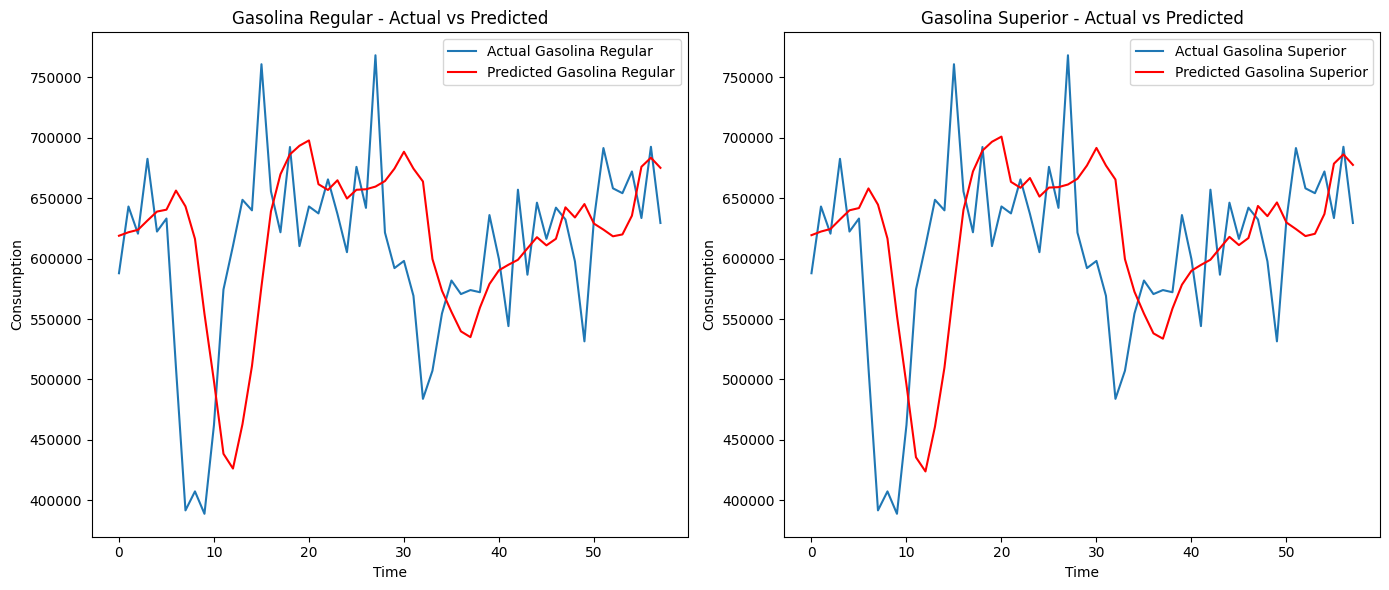

In [29]:
# Visualización de los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_superior_tunned, label='Actual Gasolina Regular')
plt.plot(predictions_superior_tunned, label='Predicted Gasolina Regular', color='red')
plt.title('Gasolina Regular - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_superior, label='Actual Gasolina Superior')
plt.plot(predictions_superior, label='Predicted Gasolina Superior', color='red')
plt.title('Gasolina Superior - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()

plt.tight_layout()
plt.show()

## Importaciones de gasolina super y regular

In [30]:
# Selección de las series temporales para gasolina regular y superior
data_superior = importacion_filtered[['Fecha', 'Gasolina superior']].copy()

# Normalizar los datos
scaler_superior = MinMaxScaler(feature_range=(0, 1))
data_superior['Gasolina superior'] = scaler_superior.fit_transform(data_superior[['Gasolina superior']])


In [31]:
look_back = 5


# Datos para Gasolina Superior
X_superior, y_superior = create_train_test(data_superior, 'Gasolina superior', look_back)
train_size = int(len(X_superior) * 0.8)
X_train_superior, X_test_superior = X_superior[:train_size], X_superior[train_size:]
y_train_superior, y_test_superior = y_superior[:train_size], y_superior[train_size:]

X_superior_tunned, y_superior_tunned = create_train_test(data_superior, 'Gasolina superior', look_back)
train_size = int(len(X_superior_tunned) * 0.8)
X_train_superior_tunned, X_test_superior_tunned = X_superior_tunned[:train_size], X_superior_tunned[train_size:]
y_train_superior_tunned, y_test_superior_tunned = y_superior_tunned[:train_size], y_superior_tunned[train_size:]



In [32]:
# Redimensionar las entradas para que sean [samples, time steps, features]

X_train_superior_tunned = np.reshape(X_train_superior_tunned, (X_train_superior_tunned.shape[0], look_back, 1))
X_test_superior_tunned = np.reshape(X_test_superior_tunned, (X_test_superior_tunned.shape[0], look_back, 1))

X_train_superior = np.reshape(X_train_superior, (X_train_superior.shape[0], look_back, 1))
X_test_superior = np.reshape(X_test_superior, (X_test_superior.shape[0], look_back, 1))

In [33]:
# Crear y entrenar modelo para Gasolina Regular
model_superior_tunned = create_lstm_model((X_train_superior_tunned.shape[1], X_train_superior_tunned.shape[2]))
model_superior_tunned.fit(X_train_superior_tunned, y_train_superior_tunned, epochs=100, batch_size=40, validation_data=(X_test_superior_tunned, y_test_superior_tunned), verbose=1)

Epoch 1/100


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - loss: 0.0813 - val_loss: 0.1236
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0399 - val_loss: 0.0506
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - val_loss: 0.0196
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - val_loss: 0.0200
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0134 - val_loss: 0.0305
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0115 - val_loss: 0.0352
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0118 - val_loss: 0.0284
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0113 - val_loss: 0.0223
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - val_loss: 0.0219
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0099 - val_loss: 0.0248
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0115 - val_loss: 0.0260
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - val_loss: 0.0245


In [34]:
# Crear y entrenar modelo para Gasolina Superior
model_superior = create_lstm_model((X_train_superior.shape[1], X_train_superior.shape[2]))
model_superior.fit(X_train_superior, y_train_superior, epochs=50, batch_size=32, validation_data=(X_test_superior, y_test_superior), verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0763 - val_loss: 0.1183
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0387 - val_loss: 0.0337
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0128 - val_loss: 0.0193
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0159 - val_loss: 0.0264
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - val_loss: 0.0345
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0112 - val_loss: 0.0296
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108 - val_loss: 0.0224
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0122 - val_loss: 0.0241
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0103 - val_loss: 0.0256
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108 - val_loss: 0.0234
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0096 - val_loss: 0.0225
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0095 - val_loss: 0.0226
E

In [35]:
# Predicciones
predictions_superior_tunned= model_superior_tunned.predict(X_test_superior_tunned)
predictions_superior = model_superior.predict(X_test_superior)



1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CFFC877BA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


In [36]:
# Invertir la normalización
predictions_superior_tunned = scaler_superior.inverse_transform(predictions_superior_tunned)
y_test_superior_tunned = scaler_superior.inverse_transform(y_test_superior_tunned.reshape(-1, 1))

predictions_superior = scaler_superior.inverse_transform(predictions_superior)
y_test_superior = scaler_superior.inverse_transform(y_test_superior.reshape(-1, 1))

In [37]:
# Calcular el error de predicción
mse_superior_tunned = mean_squared_error(y_test_superior_tunned, predictions_superior_tunned)
mse_superior = mean_squared_error(y_test_superior, predictions_superior)

print(f'Mean Squared Error for Gasolina Regular: {mse_superior_tunned}')
print(f'Mean Squared Error for Gasolina Superior: {mse_superior}')

Mean Squared Error for Gasolina Regular: 25905778285.086067
Mean Squared Error for Gasolina Superior: 25438492992.207226


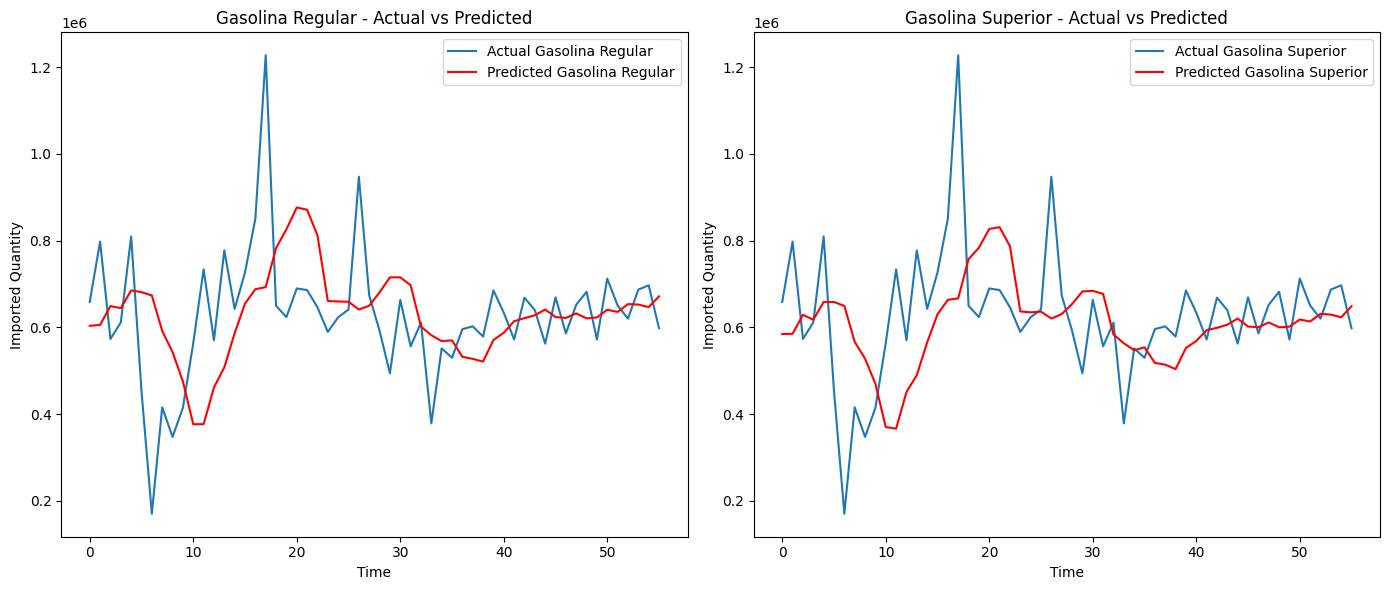

In [38]:
# Visualización de los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_superior_tunned, label='Actual Gasolina Regular')
plt.plot(predictions_superior_tunned, label='Predicted Gasolina Regular', color='red')
plt.title('Gasolina Regular - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Imported Quantity')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_superior, label='Actual Gasolina Superior')
plt.plot(predictions_superior, label='Predicted Gasolina Superior', color='red')
plt.title('Gasolina Superior - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Imported Quantity')
plt.legend()

plt.tight_layout()
plt.show()

## Precio de gasolina super y regular 

In [39]:
# ordenar los datos por fecha
precios_filtered = precios_filtered.sort_values('Fecha')

precios_filtered

,Fecha,Gasolina superior,Gasolina regular,Diesel,Gas licuado
0,2021-01-01,21.91,21.11,17.61,99.0
1,2021-01-02,21.91,21.11,17.61,99.0
2,2021-01-03,21.91,21.11,17.61,99.0
3,2021-01-04,21.91,21.11,17.61,99.0
4,2021-01-05,21.91,21.11,17.61,99.0
...,...,...,...,...,...
226,2024-08-14,32.90,31.41,27.34,110.0
227,2024-08-15,32.90,31.41,27.34,110.0
228,2024-08-16,32.90,31.41,27.34,110.0
229,2024-08-17,32.90,31.41,27.34,110.0


In [40]:

precios_superior = precios_filtered[['Fecha', 'Gasolina superior']].copy()


scaler_superior = MinMaxScaler(feature_range=(0, 1))
precios_superior['Gasolina superior'] = scaler_superior.fit_transform(precios_superior[['Gasolina superior']])


In [41]:
look_back = 5


# Datos para Gasolina Superior
X_superior, y_superior = create_train_test(precios_superior, 'Gasolina superior', look_back)
train_size = int(len(X_superior) * 0.8)
X_train_superior, X_test_superior = X_superior[:train_size], X_superior[train_size:]
y_train_superior, y_test_superior = y_superior[:train_size], y_superior[train_size:]

X_superior_tunned, y_superior_tunned = create_train_test(precios_superior, 'Gasolina superior', look_back)
train_size = int(len(X_superior_tunned) * 0.8)
X_train_superior_tunned, X_test_superior_tunned = X_superior_tunned[:train_size], X_superior_tunned[train_size:]
y_train_superior_tunned, y_test_superior_tunned = y_superior_tunned[:train_size], y_superior_tunned[train_size:]


In [42]:
# Redimensionar las entradas para que sean [samples, time steps, features]

X_train_superior_tunned = np.reshape(X_train_superior_tunned, (X_train_superior_tunned.shape[0], look_back, 1))
X_test_superior_tunned = np.reshape(X_test_superior_tunned, (X_test_superior_tunned.shape[0], look_back, 1))

X_train_superior = np.reshape(X_train_superior, (X_train_superior.shape[0], look_back, 1))
X_test_superior = np.reshape(X_test_superior, (X_test_superior.shape[0], look_back, 1))

In [43]:

model_superior_tunned = create_lstm_model((X_train_superior_tunned.shape[1], X_train_superior_tunned.shape[2]))
model_superior_tunned.fit(X_train_superior_tunned, y_train_superior_tunned, epochs=100, batch_size=40, validation_data=(X_test_superior_tunned, y_test_superior_tunned), verbose=1)


Epoch 1/100


c:\Users\jsken\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.2026 - val_loss: 0.0189
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - val_loss: 0.0024
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - val_loss: 6.0766e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 2.7464e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - val_loss: 4.7209e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 6.0054e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - val_loss: 3.4381e-04
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 2.2946e-04
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - val_loss: 6.2938e-04
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - val_loss: 2.4765e-04
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0030 - val_loss: 4.7569e-04
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━

In [44]:
# Crear y entrenar modelo para Gasolina Superior
model_superior = create_lstm_model((X_train_superior.shape[1], X_train_superior.shape[2]))
model_superior.fit(X_train_superior, y_train_superior, epochs=50, batch_size=32, validation_data=(X_test_superior, y_test_superior), verbose=1)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1347 - val_loss: 0.0021
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - val_loss: 5.1310e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - val_loss: 2.7457e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 3.1201e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 3.0393e-04
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0031 - val_loss: 8.8566e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0036 - val_loss: 2.6523e-04
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0033 - val_loss: 3.2500e-04
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028 - val_loss: 2.1872e-04
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0030 - val_loss: 3.8359e-04
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 3.1606e-04
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━

In [45]:
# Predicciones
predictions_superior_tunned= model_superior_tunned.predict(X_test_superior_tunned)
predictions_superior = model_superior.predict(X_test_superior)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step


In [46]:
# Invertir la normalización
predictions_superior_tunned = scaler_superior.inverse_transform(predictions_superior_tunned)
y_test_superior_tunned = scaler_superior.inverse_transform(y_test_superior_tunned.reshape(-1, 1))

predictions_superior = scaler_superior.inverse_transform(predictions_superior)
y_test_superior = scaler_superior.inverse_transform(y_test_superior.reshape(-1, 1))

In [47]:
# Calcular el error de predicción
mse_superior_tunned = mean_squared_error(y_test_superior_tunned, predictions_superior_tunned)
mse_superior = mean_squared_error(y_test_superior, predictions_superior)

print(f'Mean Squared Error for Gasolina Regular: {mse_superior_tunned}')
print(f'Mean Squared Error for Gasolina Superior: {mse_superior}')

Mean Squared Error for Gasolina Regular: 0.09874064555362672
Mean Squared Error for Gasolina Superior: 0.15140120458421105


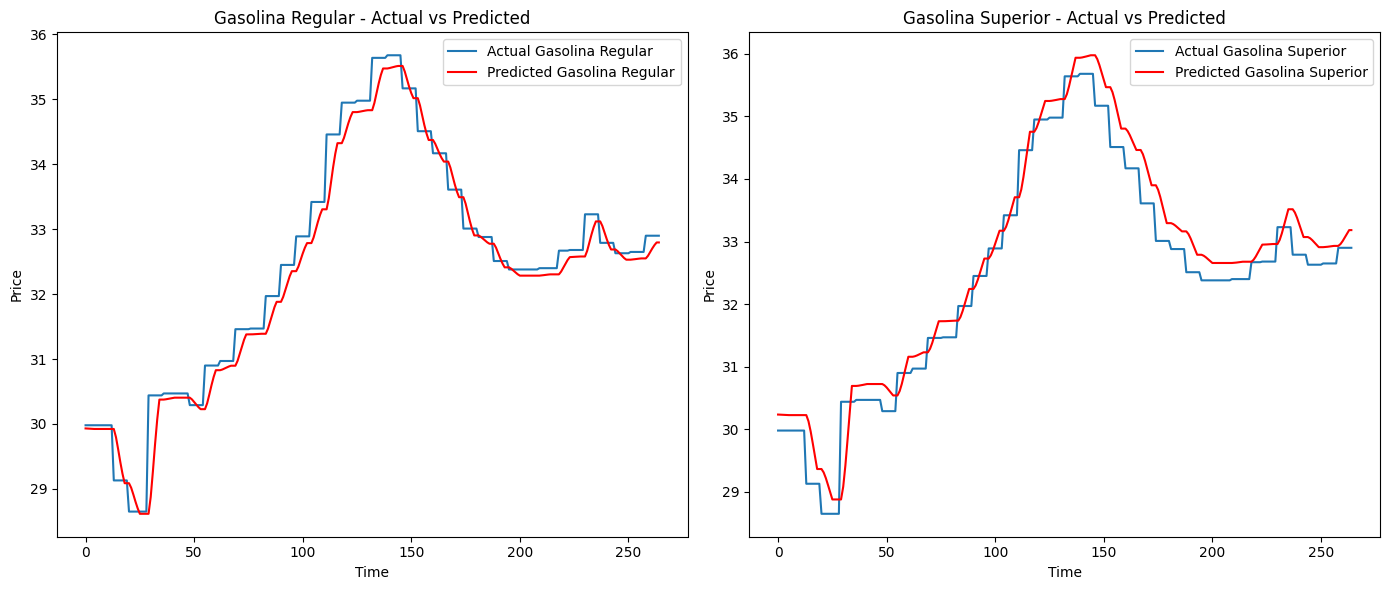

In [48]:
# Visualización de los resultados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(y_test_superior_tunned, label='Actual Gasolina Regular')
plt.plot(predictions_superior_tunned, label='Predicted Gasolina Regular', color='red')
plt.title('Gasolina Regular - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y_test_superior, label='Actual Gasolina Superior')
plt.plot(predictions_superior, label='Predicted Gasolina Superior', color='red')
plt.title('Gasolina Superior - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()